In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\prati\Downloads\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [28]:
#implementing prebuilt scilit library for scaling dataset and bringing in range of 0 and 1
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns')) #it means we're excluding price column from the entire dataset during transformation
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [29]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [30]:
#We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [31]:
def gradient_descent(X , y_true, epochs , learning_rate = 0.01):
   # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_sample = X.shape[0] #number of rows
    
    cost_list = []
    epoch_list = []
                
    for i in range(epochs):
                y_predicted = np.dot(w , X.T) + b #dot means matrix multiplication
                #T means transpose as we want to make column of 1st equal to row of second
                
                w_grad = -(2/total_sample)*(X.T.dot(y_true - y_predicted))
                b_grad = -(2/total_sample)*np.sum(y_true - y_predicted)
                
                w = w - w_grad * learning_rate
                b = b - b_grad * learning_rate
                
                cost = np.mean(np.square(y_true - y_predicted)) #mean square error and cost is loss func
                
                if i%10==0:
                        cost_list.append(cost)
                        epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
                

w, b, cost, cost_list, epoch_list = gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w , b, cost        

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [32]:
#Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
#w1 = 0.66469087 w2 = 0.60541671 bias = -0.17792104056392882

#Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

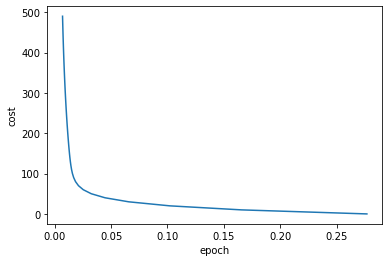

In [33]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(cost_list, epoch_list)

In [34]:
def predict (area, bedroom, w, b):
    scaled_x = sx.transform([[area,bedroom]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
#transform scales values between 0 and 1 by considering largest value of dataset as 1 and minimum value as 0 

predict(2600, 4, w, b)

128.45484403267596

In [35]:
predict (1000, 2, w, b)

30.253094462442355

In [36]:
predict (1500, 3 , w, b)

69.47860785714694

In [50]:
import random
random.randint(0,500)

419

In [53]:
#Stochastic gradient descent implementation
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_feature = X.shape[1]
    w = np.ones(shape=(number_of_feature))
    b = 0
    
    cost_list = []
    epoch_list = []
    
    total_sample = X.shape[0]
    
    for i in range(epochs):
        random_index = random.randint(0,total_sample-1)#random index from total_samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_sample)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    
    return w , b , cost , cost_list , epoch_list

w_sgd , b_sgd , cost_sgd , cost_list_sgd , epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70678563, 0.67578823]), -0.2332998808083678, 0.02241702190876432)

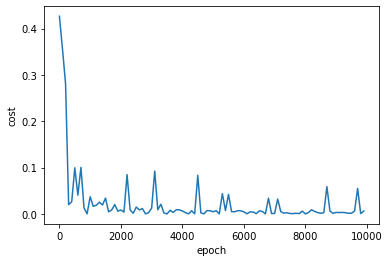

In [54]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)